# Statistical Analysis of E-Commerce and Sales 
## Objective of the Report:
This project presents a comprehensive statistical analysis, including both descriptive and inferential statistics. The study<br>
provides an understanding of statistical trends and the overall performance of the ongoing business. The analysis also<br>
offers insights into relationships between column values and interactions across different columns, supporting improved<br>
machine learning performance for prediction and future value forecasting.<br>

The dataset has been organized into three separate tables, linked using the common column Customer_id, to enable structured data<br>
storage and efficient retrieval. Some column names have been modified to improve readability. This organization enhances data<br>
management, simplifies SQL-based queries, and supports efficient data storage and retrieval in the database. It also helps address <br>
business-related problems using SQL queries and enables more effective analysis for predictive modeling and forecasting.<br>
Table names:
- Customer_details_of_ecommerce 
- Product_details_of_ecommerce 
- Delivery_and_Sales_details_of_ecommerce

## Statistical Methods Used
Descriptive Statistics:<br>
- Mean, median, and mode
- Count, minimum, and maximum
- Standard deviation and variance
- Outlier detection (IQR method)
- Data distribution analysis

Inferential Statistics:<br>
- Probability distributions (Normal, Categorical)
- Correlation and covariance analysis
- Regression analysis (simple and multiple)
- Hypothesis testing (ANOVA)
- Inferential time series analysis
- P-values

Visualizations:<br>
- Box plots
- Scatter plots
- Count plots
- Histograms
- Heatmap

Libraries Used:
- Pandas
- NumPy
- Statsmodels
- SciPy
- Matplotlib
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_ECommerce_and_Sales_Dataset.csv")

In [3]:
df.shape

(38176, 27)

In [4]:
df.head()

,Customer_id,Gender,Age,Age_category,Total_hours_spent_on_app,Number_of_times_ordered,Number_of_times_orders_accepted,Number_of_times_orders_declined,Sub_category,Category,...,Shipping_date,Delivered_date,Delivery_charge,State,Region,Payment_method,Sales,Cost,Revenue,Profit
0,CID1126403,Male,40,Middle-aged adults,16.144244,35,30,5,Smartwatch,Electronics & Gadgets,...,1/4/2019,1/4/2019,30.0,Bihar,East,Net Banking,41732.82,19171.45,40232.60,21061.15
1,CID1127059,Male,60,Senior adults,19.000000,8,3,5,AirPods,Electronics & Gadgets,...,1/5/2019,1/5/2019,99.0,Telangana,South,Net Banking,3683.82,2586.57,3842.64,1256.07
2,CID1132035,Male,18,Adolescents,5.900000,34,1,33,Camera,Electronics & Gadgets,...,1/5/2019,1/5/2019,30.0,Tamil Nadu,South,Wallet Payment,58717.75,32079.82,54064.58,21984.76
3,CID1108784,Female,21,Young adults,22.900000,25,23,2,Snacks,Snacks & Miscellaneous,...,1/5/2019,1/5/2019,299.0,Mizoram,East,UPI Methods,2661.63,1147.69,2416.96,1269.27
4,CID1134208,Female,23,Young adults,28.400000,31,9,22,Steel Plate,Kitchen & Household,...,1/5/2019,1/6/2019,299.0,Tamil Nadu,South,Cash on Delivery,82617.24,56215.77,58256.68,2040.91


## customer_details
- Customer_id                         
- Gender                              
- Age                                  
- Age_category                        
- Total_hours_spent_on_app           
- Number_of_times_ordered              
- Number_of_times_orders_accepted      
- Number_of_times_orders_declined      

In [3]:
df = df.rename(columns={
    "Customer_id": "Id_number",
    "Age_category": "Age_group",
    "Number_of_times_ordered": "Total_orders",
    "Number_of_times_orders_accepted": "Accepted_orders",
    "Number_of_times_orders_declined": "Declined_orders"
})                     

In [4]:
filtered = df[[
    "Id_number","Gender","Age","Age_group",
    "Total_hours_spent_on_app","Total_orders",
    "Accepted_orders","Declined_orders"
]]

filtered.to_csv("customer_details.csv",index=False)

In [7]:
filtered.dtypes

Id_number                    object
Gender                       object
Age                           int64
Age_group                    object
Total_hours_spent_on_app    float64
Total_orders                  int64
Accepted_orders               int64
Declined_orders               int64
dtype: object

In [5]:
filtered.shape

(38176, 8)

In [5]:
filtered.head()

,Id_number,Gender,Age,Age_group,Total_hours_spent_on_app,Total_orders,Accepted_orders,Declined_orders
0,CID1126403,Male,40,Middle-aged adults,16.144244,35,30,5
1,CID1127059,Male,60,Senior adults,19.000000,8,3,5
2,CID1132035,Male,18,Adolescents,5.900000,34,1,33
3,CID1108784,Female,21,Young adults,22.900000,25,23,2
4,CID1134208,Female,23,Young adults,28.400000,31,9,22


## Statistical analysis.

Descriptive Statistics.<br>
Show the descriptive statistics of the columns ?

In [6]:
filtered.describe()

,Age,Total_hours_spent_on_app,Total_orders,Accepted_orders,Declined_orders
count,38176.000000,38176.000000,38176.000000,38176.000000,38176.000000
mean,38.058414,16.144244,21.467886,11.203845,10.262626
std,13.398951,9.001169,12.049410,9.297772,9.324424
min,15.000000,0.500000,1.000000,1.000000,0.000000
25%,27.000000,8.400000,11.000000,4.000000,3.000000
50%,38.000000,16.144244,21.000000,8.000000,8.000000
75%,50.000000,23.900000,32.000000,17.000000,16.000000
max,61.000000,31.700000,42.000000,42.000000,41.000000


In [6]:
print("Descriptive statistics of the categorical columns:")
filtered.describe(include=['object'])

Descriptive statistics of the categorical columns:


,Id_number,Gender,Age_group
count,38176,38176,38176
unique,38176,2,6
top,CID1105880,Male,Adults
freq,1,19165,8768


In [9]:
print("Variance of the columns:")
filtered[["Age","Total_hours_spent_on_app","Total_orders","Accepted_orders","Declined_orders"]].var()

Variance of the columns:


Age                         179.531886
Total_hours_spent_on_app     81.021044
Total_orders                145.188281
Accepted_orders              86.448557
Declined_orders              86.944883
dtype: float64

- Age: Very high variance                   
- Total_orders: High variance 
- Declined_orders: Moderately high variance          
- Accepted_orders: Moderately high variance         
- Total_hours_spent_on_app: Moderate variance 

Data Distribution Analysis.<br>
What kind of data distribution is seen in the given columns?

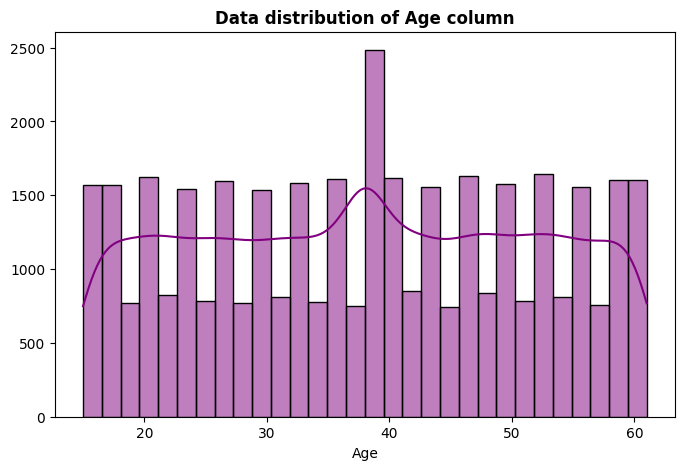

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered, x='Age', bins=30,
              kde=True, color='purple')
plt.title('Data distribution of Age column', fontweight='bold')
plt.ylabel("")
plt.show()

Unimodal, approximately normal and symmetric data distribution.

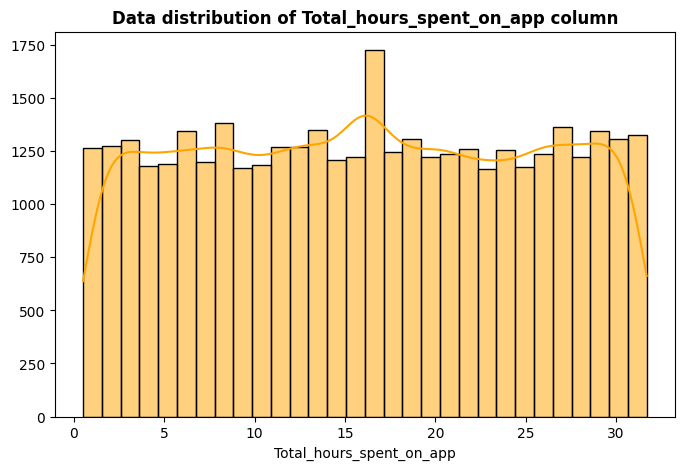

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered, x='Total_hours_spent_on_app', bins=30,
              kde=True, color='orange')
plt.title('Data distribution of Total_hours_spent_on_app column', fontweight='bold')
plt.ylabel("")
plt.show()

Uniform Data Distribution. 

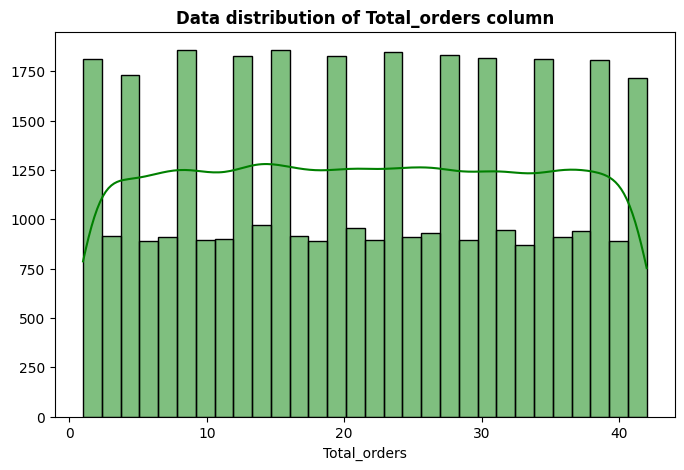

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered, x='Total_orders', bins=30,
              kde=True, color='green')
plt.title('Data distribution of Total_orders column', fontweight='bold')
plt.ylabel("")
plt.show()

Uniform Data Distribution.

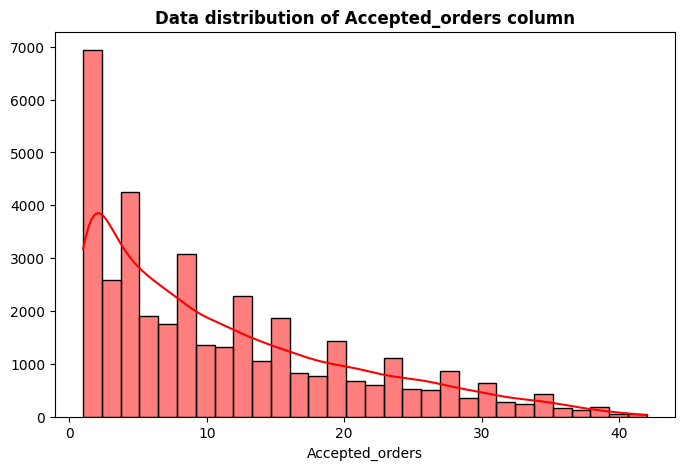

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered, x='Accepted_orders', bins=30,
              kde=True, color='red')
plt.title('Data distribution of Accepted_orders column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

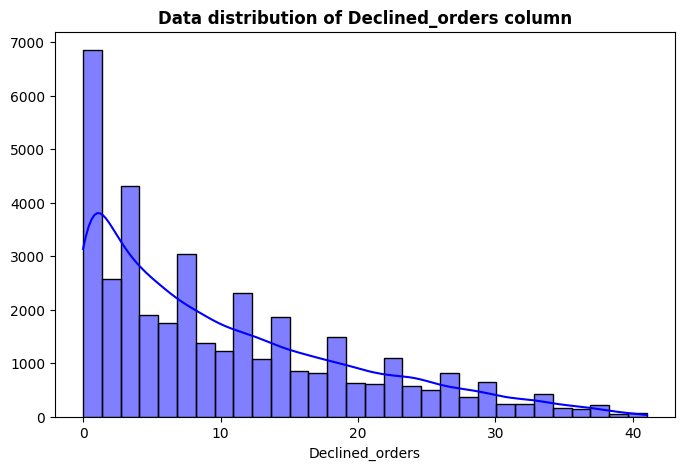

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered, x='Declined_orders', bins=30,
              kde=True, color='blue')
plt.title('Data distribution of Declined_orders column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

Normal Probability Distribution.<br>
What is the probability distribution of a future customer’s age based on age group ?
- Adolescents (15 - 19)
- Young adults (20 - 29)
- Adults (30 - 39)
- Middle-aged adults (40 - 49)
- Older adults (50 - 59)
- Senior adults (Above 59)

In [15]:
from scipy.stats import norm 
age = filtered['Age'].to_numpy()
mean = np.mean(age)
std = np.std(age)

adolescents_start = 15
adolescents_end = 19

young_adults_start = 20
young_adults_end = 29

adults_start = 30
adults_end = 39

middle_aged_start = 40
middle_aged_end = 49

older_adults_start = 50
older_adults_end = 59

seniors_adults_start = 60
seniors_adults_end = 61

adolescents = norm.cdf(adolescents_end, mean, std) - norm.cdf(adolescents_start, mean, std)
rounded_adolescents = np.round(adolescents, 4)
print("Probability of Adolescents:",rounded_adolescents)
perce_adolescents = np.round(rounded_adolescents * 100, 2)
print("Percentage of Adolescents:",perce_adolescents)
print("")

young_adults = norm.cdf(young_adults_end, mean, std) - norm.cdf(young_adults_start, mean, std)
rounded_young_adults = np.round(young_adults, 4)
print("Probability of Young adults:",rounded_young_adults)
perce_young_adults = np.round(rounded_young_adults * 100, 2)
print("Percentage of Young adults:",perce_young_adults)
print("")

adults = norm.cdf(adults_end, mean, std) - norm.cdf(adults_start, mean, std)
rounded_adults = np.round(adults, 4)
print("Probability of Adults:",rounded_adults)
perce_adults = np.round(rounded_adults * 100, 2)
print("Percentage of Adults:",perce_adults)
print("")

middle_aged = norm.cdf(middle_aged_end, mean, std) - norm.cdf(middle_aged_start, mean, std)
rounded_middle_aged = np.round(middle_aged, 4)
print("Probability of Middle aged adults:",rounded_middle_aged)
perce_middle_aged = np.round(rounded_middle_aged * 100, 2)
print("Percentage of Middle aged adults:",perce_middle_aged)
print("")

older_adults = norm.cdf(older_adults_end, mean, std) - norm.cdf(older_adults_start, mean, std)
rounded_older_adults = np.round(older_adults, 4)
print("Probability of Older adults:",rounded_older_adults)
perce_older_adults = np.round(rounded_older_adults * 100, 2)
print("Percentage of Older adults:",perce_older_adults)
print("")

senior_adults = norm.cdf(seniors_adults_end, mean, std) - norm.cdf(seniors_adults_start, mean, std)
rounded_senior_adults = np.round(senior_adults, 4)
print("Probability of Senior adults:",rounded_senior_adults)
perce_senior_adults = np.round(rounded_senior_adults * 100, 2)
print("Percentage of Senior adults:",perce_senior_adults)



Probability of Adolescents: 0.0348
Percentage of Adolescents: 3.48

Probability of Young adults: 0.1606
Percentage of Young adults: 16.06

Probability of Adults: 0.2542
Percentage of Adults: 25.42

Probability of Middle aged adults: 0.2353
Percentage of Middle aged adults: 23.53

Probability of Older adults: 0.1274
Percentage of Older adults: 12.74

Probability of Senior adults: 0.0073
Percentage of Senior adults: 0.73


What is the probability distribution of a future customer’s age between 25 and 50 ?

In [7]:
from scipy.stats import norm 
age = filtered['Age'].to_numpy()
mean = np.mean(age)
std = np.std(age)

age_start = 25
age_end = 45

prob = norm.cdf(age_end, mean, std) - norm.cdf(age_start, mean, std)
rounded_prob = np.round(prob, 4)
print("Probability of Adolescents:",rounded_prob)
percentage = np.round(rounded_prob * 100, 2)
print("Percentage of Adolescents:",percentage)

Probability of Adolescents: 0.5329
Percentage of Adolescents: 53.29


The age range of 25 to 45 was chosen because most individuals in this group typically have permanent jobs, are financially <br>
capable of purchasing products, and are more likely to spend time on social media. Therefore, they represent key customers <br>
with a higher potential to purchase more products in the future

Categorical Probability Distribution.<br>
Which age group purchased more products ?

In [38]:
age_prob = filtered['Age_group'].value_counts(normalize=True)
rounded_age_prob = age_prob.round(4)
print("\nCategorical Probability Distribution of", rounded_age_prob)
perce = np.round(rounded_age_prob * 100, 2)
print("\nPercentage of",perce)

age_groups = filtered['Age_group'].value_counts()
print("\nCount of", age_groups)


Categorical Probability Distribution of Age_group
Adults                0.2297
Middle-aged adults    0.2101
Older adults          0.2081
Young adults          0.2077
Adolescents           0.1024
Senior adults         0.0420
Name: proportion, dtype: float64

Percentage of Age_group
Adults                22.97
Middle-aged adults    21.01
Older adults          20.81
Young adults          20.77
Adolescents           10.24
Senior adults          4.20
Name: proportion, dtype: float64

Count of Age_group
Adults                8768
Middle-aged adults    8022
Older adults          7945
Young adults          7928
Adolescents           3909
Senior adults         1604
Name: count, dtype: int64


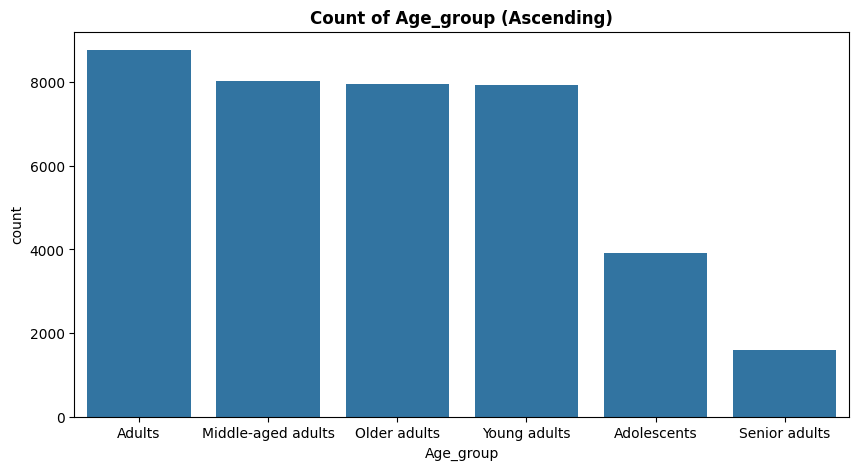

In [31]:
age_order = filtered['Age_group'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.countplot(data=filtered, x='Age_group', order=age_order)
plt.title('Count of Age_group (Ascending)', fontweight='bold')
plt.show()

Correlation & Covariance Analysis.<br>
Does spending more time on the app influence customers to purchase more products ?

In [11]:
correlation = df[['Total_hours_spent_on_app', 'Total_orders']].corr()
print("\nCorrelation value:\n", correlation)

covariance = df[['Total_hours_spent_on_app', 'Total_orders']].cov()
print("\nCovariance value:\n", covariance)


Correlation value:
                           Total_hours_spent_on_app  Total_orders
Total_hours_spent_on_app                  1.000000     -0.005137
Total_orders                             -0.005137      1.000000

Covariance value:
                           Total_hours_spent_on_app  Total_orders
Total_hours_spent_on_app                 81.021044     -0.557117
Total_orders                             -0.557117    145.188281


Analysis shows a correlation of -0.005, which is very close to zero. This indicates no clear relationship between <br>
time spent on the app and the number of purchases. The covariance is -0.557, which is very small and also suggests<br>
a very weak inverse relationship. Overall, spending more time on the app does not influence users to buy more.

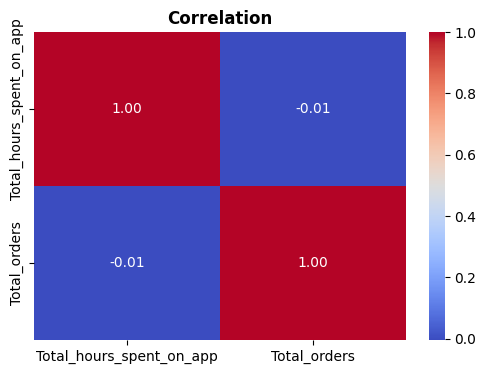

In [43]:
corr = filtered[['Total_hours_spent_on_app', 'Total_orders']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation', fontweight='bold')
plt.show()

Regression Analysis.<br>
How do a user’s age and total hours spent on the app influence the total number of orders they place?

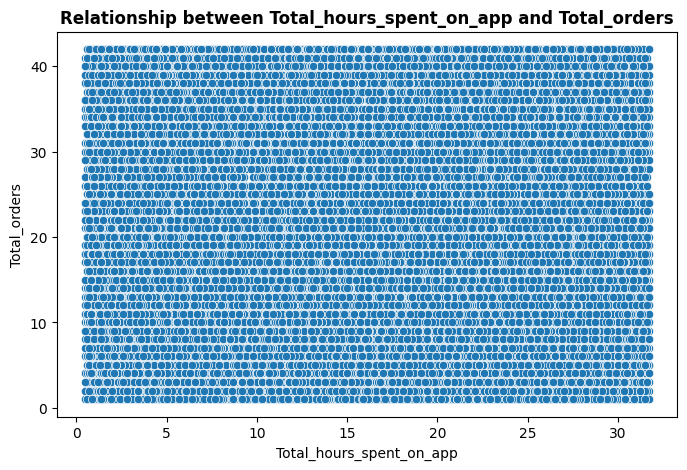

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered, x='Total_hours_spent_on_app', y='Total_orders')
plt.title('Relationship between Total_hours_spent_on_app and Total_orders', fontweight='bold')
plt.show()

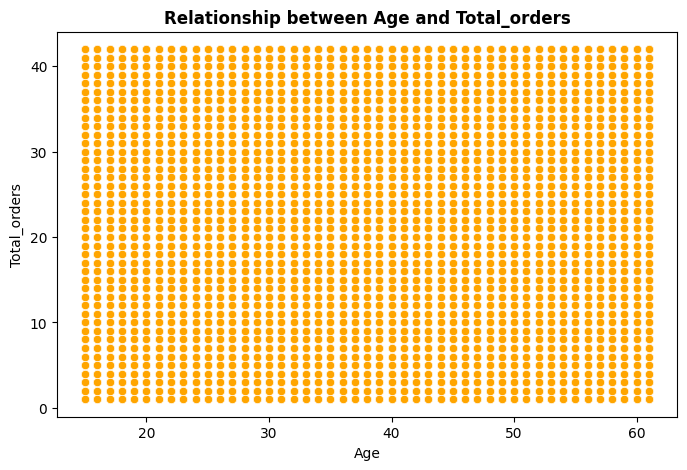

In [15]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered, x='Age', y='Total_orders', color='orange')
plt.title('Relationship between Age and Total_orders', fontweight='bold')
plt.show()

In [22]:
import statsmodels.api as sm

# Independent variables
X = filtered[['Age', 'Total_hours_spent_on_app']]
# Dependent variable
Y = filtered['Total_orders']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_orders   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8919
Date:                Mon, 15 Dec 2025   Prob (F-statistic):              0.410
Time:                        13:39:19   Log-Likelihood:            -1.4919e+05
No. Observations:               38176   AIC:                         2.984e+05
Df Residuals:                   38173   BIC:                         2.984e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The regression analysis shows the model is weak and does not explain much. Age has a small negative effect, and <br>
Total_hours_spent_on_app also has a negative effect. Both are not statistically significant, which means they<br>
do not affect whether customers buy more or fewer products

Outliers Detection.<br>
Are there outliers in the given columns ?

Q1: 27.0
Q3: 50.0
IQR: 23.0
Lower Bound: -7.5
Upper Bound: 84.5
Outliers in Age: []


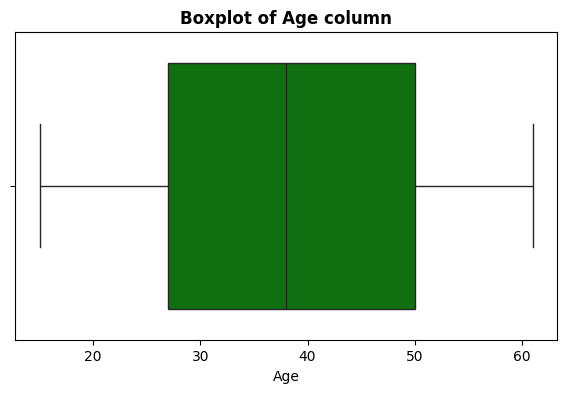

In [15]:
age = filtered['Age'].to_numpy()
q1 = np.percentile(age, 25)
q3 = np.percentile(age, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = age[(age < lower_bound) | (age > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Age:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered['Age'],color='green')
plt.title('Boxplot of Age column', fontweight='bold')
plt.show()

Q1: 8.4
Q3: 23.9
IQR: 15.499999999999998
Lower Bound: -14.849999999999996
Upper Bound: 47.14999999999999
Outliers in Total_hours_spent_on_app: []


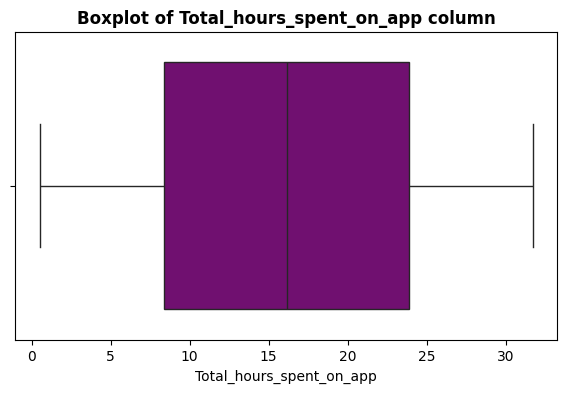

In [14]:
total_hours = filtered['Total_hours_spent_on_app'].to_numpy()
q1 = np.percentile(total_hours, 25)
q3 = np.percentile(total_hours, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = total_hours[(total_hours < lower_bound) | (total_hours > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Total_hours_spent_on_app:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered['Total_hours_spent_on_app'],color='purple')
plt.title('Boxplot of Total_hours_spent_on_app column', fontweight='bold')
plt.show()

Q1: 11.0
Q3: 32.0
IQR: 21.0
Lower Bound: -20.5
Upper Bound: 63.5
Outliers in Total_orders: []


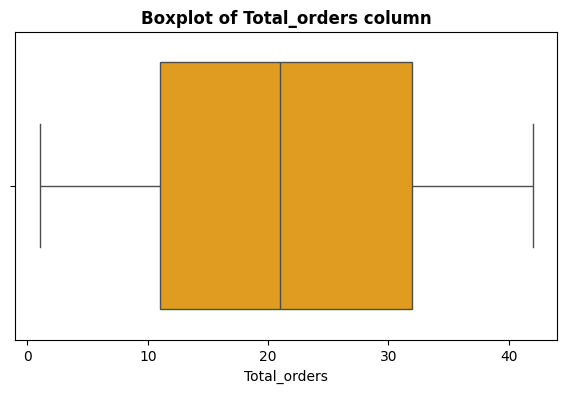

In [13]:
total_orders = filtered['Total_orders'].to_numpy()
q1 = np.percentile(total_orders, 25)
q3 = np.percentile(total_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = total_orders[(total_orders < lower_bound) | (total_orders > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Total_orders:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered['Total_orders'],color='orange')
plt.title('Boxplot of Total_orders column', fontweight='bold')
plt.show()

Q1: 4.0
Q3: 17.0
IQR: 13.0
Lower Bound: -15.5
Upper Bound: 36.5
Outliers in Accepted_orders: [38 39 37 37 39 41 41 40 41 42 41 38 42 37 37 38 39 39 40 39 37 37 38 39
 39 39 37 37 37 38 38 39 38 38 37 37 38 38 41 39 40 42 38 40 40 39 37 41
 37 37 40 37 37 38 37 39 37 40 39 37 40 40 37 40 37 37 38 40 39 37 38 39
 38 39 37 40 40 38 39 39 40 41 37 39 38 37 39 39 41 40 39 37 39 40 39 39
 41 37 39 37 42 39 38 38 39 41 42 40 39 37 39 38 37 41 37 40 37 37 38 41
 38 37 38 38 38 40 37 41 37 40 37 37 41 37 39 41 41 37 38 38 37 38 37 37
 37 37 37 37 37 39 39 37 37 38 39 37 40 39 40 37 39 37 38 37 38 41 41 38
 39 39 37 41 38 39 37 38 37 37 39 40 37 39 37 38 38 39 41 37 37 38 38 40
 42 38 37 40 37 37 41 39 37 42 39 38 37 37 38 37 38 38 37 40 39 40 37 37
 39 40 37 42 37 40 37 38 38 37 40 39 38 38 40 38 39 37 39 38 37 38 42 38
 42 38 37 42 41 38 39 37 38 42 38 38 38 37 37 38 41 38 38 41 38 38 40 40
 40 40 39 39 41 38 40 41 37 39 39 37 38 38 38 39 38 40 38 38 40 38 38 39
 38 37 37 41 40 37 40 39 39 38 

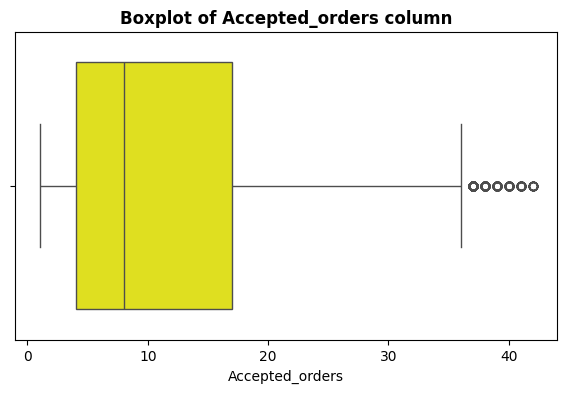

In [16]:
accepted_orders = filtered['Accepted_orders'].to_numpy()
q1 = np.percentile(accepted_orders, 25)
q3 = np.percentile(accepted_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = accepted_orders[(accepted_orders < lower_bound) | (accepted_orders > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Accepted_orders:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered['Accepted_orders'],color='yellow')
plt.title('Boxplot of Accepted_orders column', fontweight='bold')
plt.show()

Q1: 3.0
Q3: 16.0
IQR: 13.0
Lower Bound: -16.5
Upper Bound: 35.5
Outliers in Accepted_orders: [37 36 39 37 37 36 38 36 36 37 40 41 37 36 41 38 38 37 38 36 38 39 39 36
 36 36 38 39 37 37 36 37 37 37 36 39 37 40 37 37 38 40 36 37 37 37 37 38
 40 36 36 37 36 38 38 36 36 39 40 38 36 40 37 38 39 41 40 41 38 37 37 39
 37 37 38 36 37 39 38 41 37 40 37 40 38 36 38 39 39 40 36 37 39 37 36 37
 36 36 36 37 40 37 38 39 36 36 37 36 38 39 38 36 40 39 37 37 36 41 39 39
 38 38 39 36 37 39 39 37 36 38 36 36 38 36 36 39 37 36 40 37 37 41 37 40
 39 37 39 38 37 36 37 37 39 36 38 36 36 37 38 39 37 39 37 36 36 37 37 37
 36 37 38 40 36 36 37 38 39 39 36 37 37 39 36 38 39 37 36 36 38 38 36 38
 36 39 37 38 37 36 37 36 40 37 41 36 40 37 36 38 39 41 37 39 37 39 36 39
 40 36 37 38 38 37 36 37 37 39 37 37 36 40 41 37 39 36 39 37 37 40 39 36
 38 36 36 40 36 38 38 37 36 38 36 37 36 37 36 36 37 40 38 41 36 36 36 38
 36 36 38 37 37 40 38 36 41 37 36 39 36 39 40 36 37 36 38 38 41 36 38 38
 38 37 37 38 36 41 36 38 37 36 

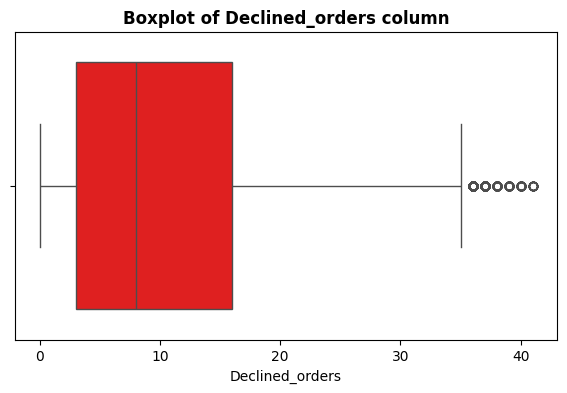

In [17]:
declined_orders = filtered['Declined_orders'].to_numpy()
q1 = np.percentile(declined_orders, 25)
q3 = np.percentile(declined_orders, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = declined_orders[(declined_orders < lower_bound) | (declined_orders > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Accepted_orders:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered['Declined_orders'],color='red')
plt.title('Boxplot of Declined_orders column', fontweight='bold')
plt.show()

## product_details 
- Id_number
- Sub_category                       
- Category                            
- Real_price                        
- Marketing_price                    
- Quantity                             
- Discount                           
- Customer_feedback                   
- Customer_rating 

In [5]:
df = df.rename(columns=
              {"Customer_feedback":"Feedback",
               "Customer_rating":"Rating"
              })

In [6]:
filtered2 = df [[
            "Id_number","Category","Sub_category",                            
            "Real_price","Marketing_price",
            "Quantity","Discount",
            "Feedback","Rating"
]]
filtered2.to_csv("product_details.csv",index=False)

In [12]:
filtered2.shape

(38176, 9)

In [20]:
filtered2.head()

,Id_number,Category,Sub_category,Real_price,Marketing_price,Quantity,Discount,Feedback,Rating
0,CID1126403,Electronics & Gadgets,Smartwatch,14950.24,20866.41,2,5.00,Excellent,5
1,CID1127059,Electronics & Gadgets,AirPods,973.05,1227.94,3,4.79,Very Good,4
2,CID1132035,Electronics & Gadgets,Camera,50316.65,58717.75,1,0.00,Not good,1
3,CID1108784,Snacks & Miscellaneous,Snacks,1889.11,2661.63,1,30.00,Not good,1
4,CID1134208,Kitchen & Household,Steel Plate,64070.24,82617.24,1,5.00,Poor,0


## Statistical analysis.

Descriptive Statistics.<br>
Show the descriptive statistics of the columns ?

In [8]:
filtered2.describe()

,Real_price,Marketing_price,Quantity,Discount,Rating
count,38176.000000,38176.000000,38176.000000,38176.000000,38176.000000
mean,13587.119018,17726.333030,1.366356,15.001978,3.016293
std,19354.920007,25546.807495,0.719677,9.828824,1.725800
min,50.020000,52.130000,1.000000,0.000000,0.000000
25%,1645.430000,2106.290000,1.000000,5.000000,2.000000
50%,8133.725000,10401.200000,1.000000,15.000000,4.000000
75%,15849.845000,20320.815000,2.000000,25.000000,4.000000
max,99999.890000,157773.410000,5.000000,140.000000,5.000000


In [10]:
print("Descriptive statistics of the categorical columns:")
filtered2.describe(include=['object'])

Descriptive statistics of the categorical columns:


,Id_number,Category,Sub_category,Feedback
count,38176,38176,38176,38176
unique,38176,8,43,6
top,CID1105880,Electronics & Gadgets,Mobile Phone,Very Good
freq,1,10067,2428,9846


In [33]:
print("Variance of the columns:")
filtered2[["Real_price","Marketing_price","Quantity","Discount","Rating"]].var()

Variance of the columns:


Real_price         3.746129e+08
Marketing_price    6.526394e+08
Quantity           5.179344e-01
Discount           9.660578e+01
Rating             2.978385e+00
dtype: float64

- Real_price: High variance         
- Marketing_price: High variance
- Discount: Moderate variance
- Quantity: Low variance
- Rating: Low variance

Data Distribution Analysis.<br>
What kind of data distribution is seen in the given columns ?

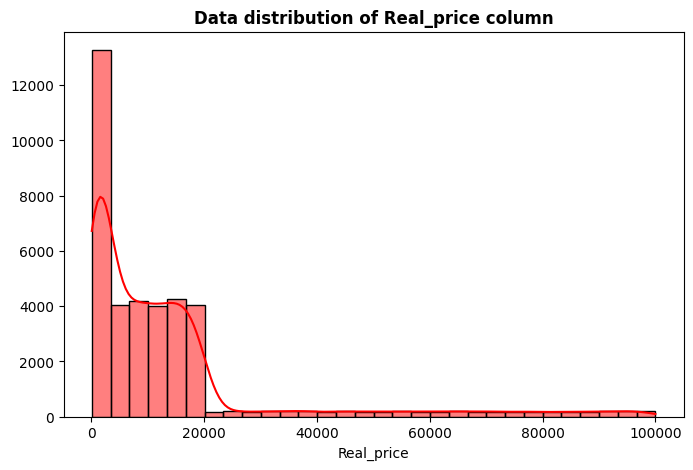

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered2, x='Real_price', bins=30,
              kde=True, color='red')
plt.title('Data distribution of Real_price column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

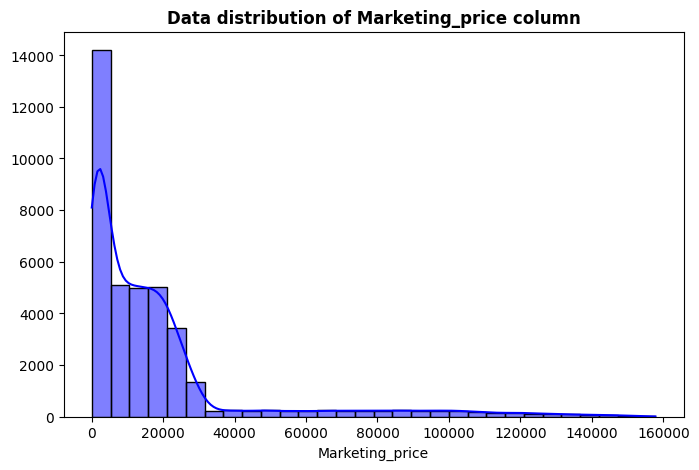

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered2, x='Marketing_price', bins=30,
              kde=True, color='blue')
plt.title('Data distribution of Marketing_price column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

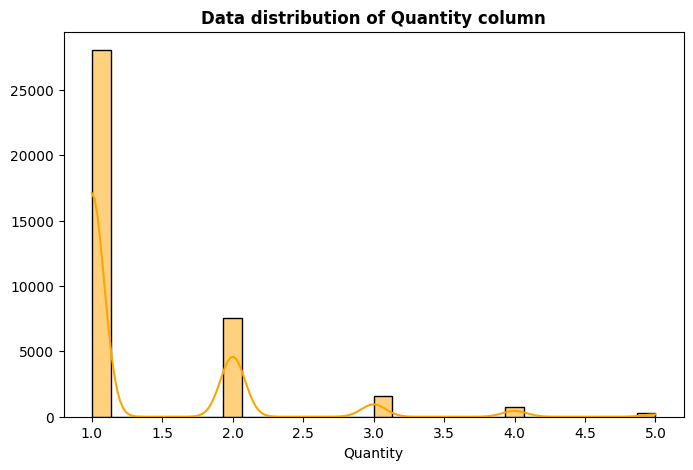

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered2, x='Quantity', bins=30,
              kde=True, color='orange')
plt.title('Data distribution of Quantity column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

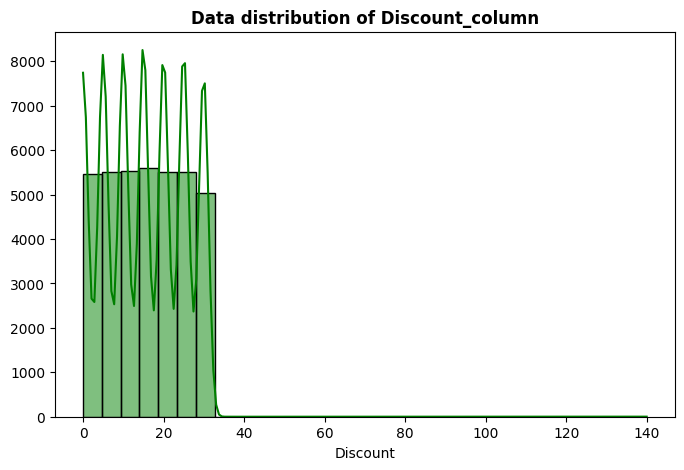

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered2, x='Discount', bins=30,
              kde=True, color='green')
plt.title('Data distribution of Discount_column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

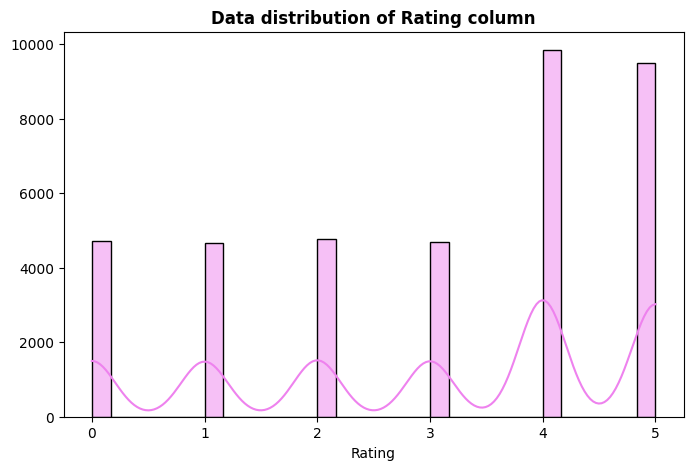

In [73]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered2, x='Rating', bins=30,
              kde=True, color='violet')
plt.title('Data distribution of Rating column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

Regression Analysis.<br>
Does a higher discount lead to people buying more products?

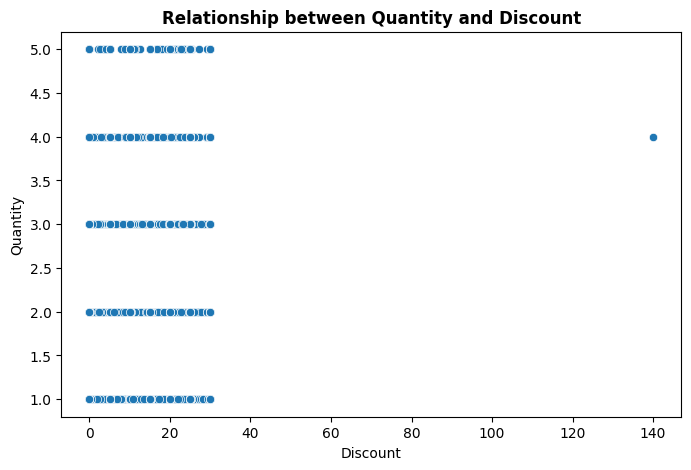

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=filtered2, x='Discount', y='Quantity')
plt.title('Relationship between Quantity and Discount', fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.show()

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Quantity ~ Discount', data=filtered2).fit()

# Summary of regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3060
Date:                Mon, 15 Dec 2025   Prob (F-statistic):              0.580
Time:                        15:52:25   Log-Likelihood:                -41611.
No. Observations:               38176   AIC:                         8.323e+04
Df Residuals:                   38174   BIC:                         8.324e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3632      0.007    202.826      0.0

This shows a poor regression analysis result, including an insignificant p-value, low R², and weak coefficient values.<br>
Therefore, an increase in the discount price is not associated with an increase in quantity people are not buying more<br>
products even when higher discounts are offered.

Correlation and Covariance Analyis.<br>
Does the marketing price increase when the real price increases ?

In [26]:
correlation = filtered2[['Real_price', 'Marketing_price']].corr()
print("\nCorrelation value:\n", correlation)

covariance = filtered2[['Real_price', 'Marketing_price']].cov()
print("\nCovariance value:\n", covariance)


Correlation value:
                  Real_price  Marketing_price
Real_price         1.000000         0.984599
Marketing_price    0.984599         1.000000

Covariance value:
                    Real_price  Marketing_price
Real_price       3.746129e+08     4.868411e+08
Marketing_price  4.868411e+08     6.526394e+08


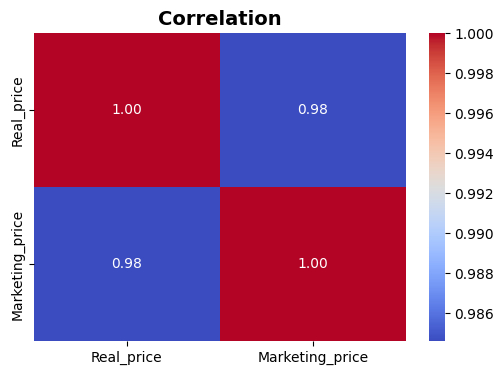

In [29]:
corr = filtered2[['Real_price', 'Marketing_price']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation', fontsize=14, fontweight='bold')
plt.show()

Yes, this shows a highly positive correlation. The correlation value is close to 1 therefore, when the real price <br>
increases, the marketing price also increases.

Hypothesis Testing (Anova).<br>
Are the average product ratings influenced by the product Category or Sub-category?

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Rating ~ C(Sub_category)', data=filtered2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")
model = ols('Rating ~ C(Category)', data=filtered2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                        sum_sq       df         F    PR(>F)
C(Sub_category)      95.880887     42.0  0.766285  0.862871
Residual         113603.984893  38133.0       NaN       NaN

                    sum_sq       df        F    PR(>F)
C(Category)       7.676544      7.0  0.36816  0.921172
Residual     113692.189236  38168.0      NaN       NaN


Both product category and sub-category do not significantly influence average ratings, as their p-values <br>
(0.86 and 0.92) are far above the significance level of 0.05.

Does the average quantity of sales depend on Category or Sub_category ?

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Quantity ~ C(Sub_category)', data=filtered2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")
model = ols('Quantity ~ C(Category)', data=filtered2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq       df         F    PR(>F)
C(Sub_category)     29.376835     42.0  1.350979  0.064118
Residual         19742.770587  38133.0       NaN       NaN

                   sum_sq       df         F    PR(>F)
C(Category)      5.180617      7.0  1.429035  0.188427
Residual     19766.966806  38168.0       NaN       NaN


The average quantity of sales does not depend on the sub-category. The p-value (0.06) is slightly above the significance<br>
level of 0.05, meaning the result is not statistically significant. However, the value is close to the threshold,<br>
suggesting a possible weak difference that is not strong enough to be confirmed statistically.<br>

The average quantity of sales does not depend on the product category.The p-value (0.16) is higher than the <br>
significance level of 0.05, meaning there is no statistically significant difference in sales quantity across categories.

Categorical Probability Distribution.<br>
Which feedback was given by most customers ?

In [61]:
Feedback_prob = filtered2['Feedback'].value_counts(normalize=True)
rounded_Feedback_prob = Feedback_prob.round(3)
print("Probability of",rounded_Feedback_prob)

perce_Feedback = np.round(rounded_Feedback_prob * 100, 2)
print("\nPercentage of",perce_Feedback)

count_Feedback = filtered2['Feedback'].value_counts()
print("\nCount of", count_Feedback)

Probability of Feedback
Very Good    0.258
Excellent    0.249
Average      0.125
Poor         0.124
Good         0.123
Not good     0.122
Name: proportion, dtype: float64

Percentage of Feedback
Very Good    25.8
Excellent    24.9
Average      12.5
Poor         12.4
Good         12.3
Not good     12.2
Name: proportion, dtype: float64

Count of Feedback
Very Good    9846
Excellent    9504
Average      4767
Poor         4717
Good         4685
Not good     4657
Name: count, dtype: int64


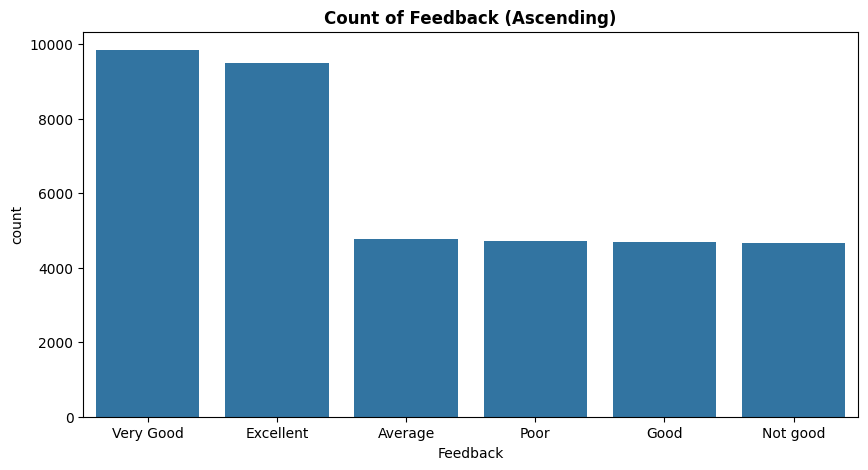

In [33]:
age_order = filtered2['Feedback'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.countplot(data=filtered2, x='Feedback', order=age_order)
plt.title('Count of Feedback (Ascending)', fontweight='bold')
plt.show()

Outliers Detection.<br>
Are there outliers in the given columns ?

Q1: 1645.43
Q3: 15849.845
IQR: 14204.414999999999
Lower Bound: -19661.192499999997
Upper Bound: 37156.4675
Outliers in Real price: [50316.65 64070.24 75141.52 ... 39676.25 63553.68 87449.14]


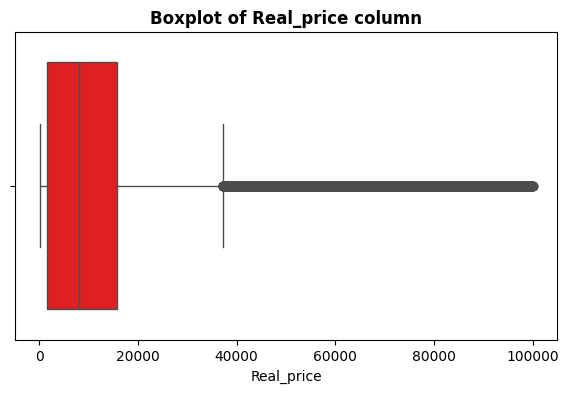

In [26]:
real_price = filtered2['Real_price'].to_numpy()
q1 = np.percentile(real_price, 25)
q3 = np.percentile(real_price, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = real_price[(real_price < lower_bound) | (real_price > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Real price:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered2['Real_price'],color='red')
plt.title('Boxplot of Real_price column', fontweight='bold')
plt.show()

Q1: 2106.29
Q3: 20320.815000000002
IQR: 18214.525
Lower Bound: -25215.4975
Upper Bound: 47642.60250000001
Outliers in Marketing price column: [ 58717.75  82617.24  97967.88 ...  47715.92  93672.63 133709.92]


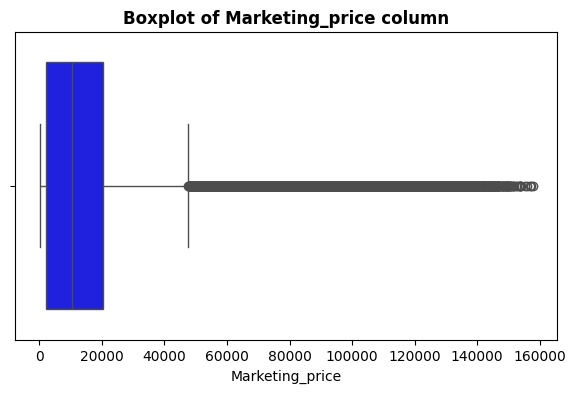

In [27]:
marketing_price = filtered2['Marketing_price'].to_numpy()
q1 = np.percentile(marketing_price, 25)
q3 = np.percentile(marketing_price, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = marketing_price[(marketing_price < lower_bound) | (marketing_price > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Marketing price column:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered2['Marketing_price'],color='blue')
plt.title('Boxplot of Marketing_price column', fontweight='bold')
plt.show()

Q1: 1.0
Q3: 2.0
IQR: 1.0
Lower Bound: -0.5
Upper Bound: 3.5
Outliers in Quantity: [5 4 4 ... 4 4 4]


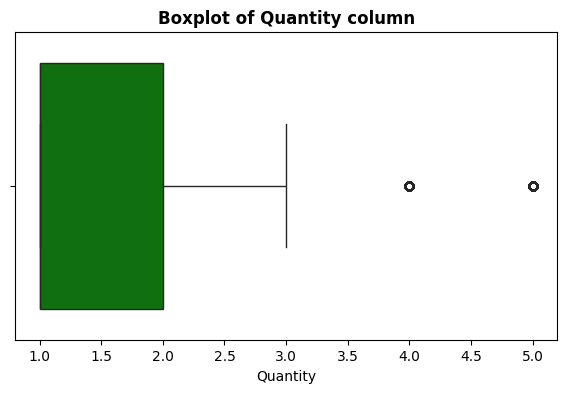

In [28]:
quantity = filtered2['Quantity'].to_numpy()
q1 = np.percentile(quantity, 25)
q3 = np.percentile(quantity, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = quantity[(quantity < lower_bound) | (quantity > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Quantity:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered2['Quantity'],color='green')
plt.title('Boxplot of Quantity column', fontweight='bold')
plt.show()

Q1: 5.0
Q3: 25.0
IQR: 20.0
Lower Bound: -25.0
Upper Bound: 55.0
Outliers in Discount: [140.]


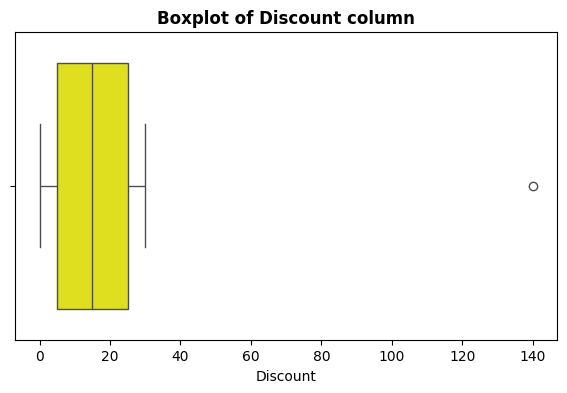

In [29]:
discount = filtered2['Discount'].to_numpy()
q1 = np.percentile(discount, 25)
q3 = np.percentile(discount, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = discount[(discount < lower_bound) | (discount > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Discount:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered2['Discount'],color='yellow')
plt.title('Boxplot of Discount column', fontweight='bold')
plt.show()

Q1: 2.0
Q3: 4.0
IQR: 2.0
Lower Bound: -1.0
Upper Bound: 7.0
Outliers in Rating: []


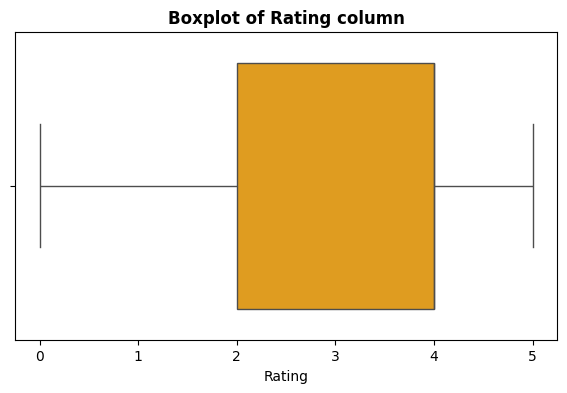

In [30]:
rating = filtered2['Rating'].to_numpy()
q1 = np.percentile(rating, 25)
q3 = np.percentile(rating, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = rating[(rating < lower_bound) | (rating > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Rating:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered2['Rating'],color='orange')
plt.title('Boxplot of Rating column', fontweight='bold')
plt.show()

## delivery_and_sales_details

In [7]:
filtered3 = df [[
            "Id_number","Order_date","Shipping_date","Delivered_date",                      
            "Delivery_charge","State","Region","Payment_method",
            "Sales","Cost","Revenue","Profit" 
               ]]

filtered3.to_csv("delivery_and_sales_details.csv",index=False)

In [6]:
filtered3.shape

(38176, 12)

In [7]:
filtered3.head()

,Id_number,Order_date,Shipping_date,Delivered_date,Delivery_charge,State,Region,Payment_method,Sales,Cost,Revenue,Profit
0,CID1126403,1/2/2019,1/4/2019,1/4/2019,30.0,Bihar,East,Net Banking,41732.82,19171.45,40232.60,21061.15
1,CID1127059,1/5/2019,1/5/2019,1/5/2019,99.0,Telangana,South,Net Banking,3683.82,2586.57,3842.64,1256.07
2,CID1132035,1/4/2019,1/5/2019,1/5/2019,30.0,Tamil Nadu,South,Wallet Payment,58717.75,32079.82,54064.58,21984.76
3,CID1108784,1/4/2019,1/5/2019,1/5/2019,299.0,Mizoram,East,UPI Methods,2661.63,1147.69,2416.96,1269.27
4,CID1134208,1/3/2019,1/5/2019,1/6/2019,299.0,Tamil Nadu,South,Cash on Delivery,82617.24,56215.77,58256.68,2040.91


- Id_number
- Order_date	
- Shipping_date	
- Delivered_date	
- Delivery_charge	
- State	Region	
- Payment_method	
- Sales	Cost	
- Revenue	
- Profit

## Statistical analysis

Descriptive Statistics.<br>
Show the descriptive statistics of the columns ?

In [8]:
filtered3.describe()

,Delivery_charge,Sales,Cost,Revenue,Profit
count,38176.000000,38176.000000,38176.000000,38176.000000,38176.000000
mean,144.258454,24126.297986,15273.432558,20934.936340,5661.503782
std,107.459286,41073.386272,26343.796780,34700.225392,12234.888526
min,0.000000,52.180000,30.890000,0.000000,-118432.880000
25%,50.000000,2584.765000,1634.525000,3280.680000,1060.890000
50%,120.000000,12146.315000,7655.790000,10782.960000,2285.420000
75%,249.000000,24585.460000,15674.207500,21507.312500,6025.807500
max,499.980000,615271.800000,483514.260000,573823.420000,249250.760000


In [19]:
print("Descriptive statistics of the categorical columns:")
filtered3.describe(include=['object'])

Descriptive statistics of the categorical columns:


,Id_number,Order_date,Shipping_date,Delivered_date,State,Region,Payment_method
count,38176,38176,38176,38176,38176,38176,38176
unique,38176,2191,2203,2199,25,5,7
top,CID1105880,12/30/2024,1/12/2025,12/29/2024,Kerala,East,UPI Methods
freq,1,377,91,68,3852,12916,9298


In [54]:
print("Variance of the columns:")
filtered3[["Delivery_charge", "Sales", "Cost", "Revenue", "Profit"]].var()

Variance of the columns:


Delivery_charge    1.154750e+04
Sales              1.687023e+09
Cost               6.939956e+08
Revenue            1.204106e+09
Profit             1.496925e+08
dtype: float64

- Sales: Very high variance
- Cost: High variance
- Revenue: High variance
- Profit: Moderately high variance
- Delivery_charge: Moderate variance

Data Distribution Analysis.<br>
What kind of data distribution is seen in the given columns?

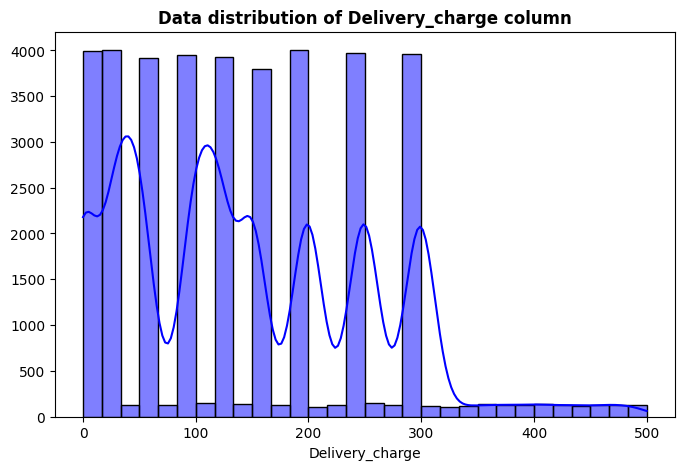

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered3, x='Delivery_charge', bins=30,
              kde=True, color='blue')
plt.title('Data distribution of Delivery_charge column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution. 

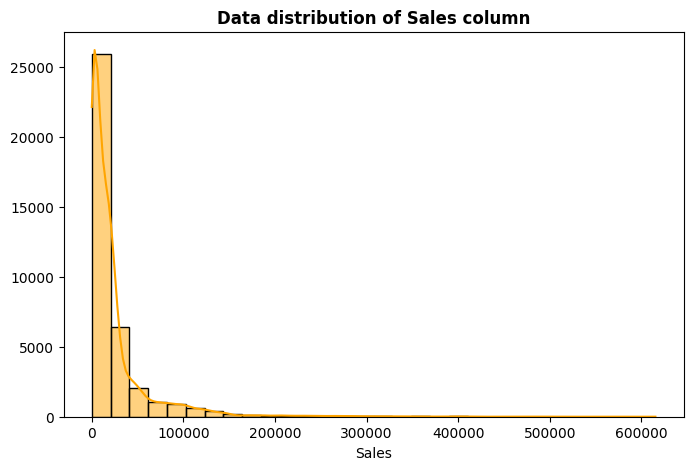

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered3, x='Sales', bins=30,
              kde=True, color='orange')
plt.title('Data distribution of Sales column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

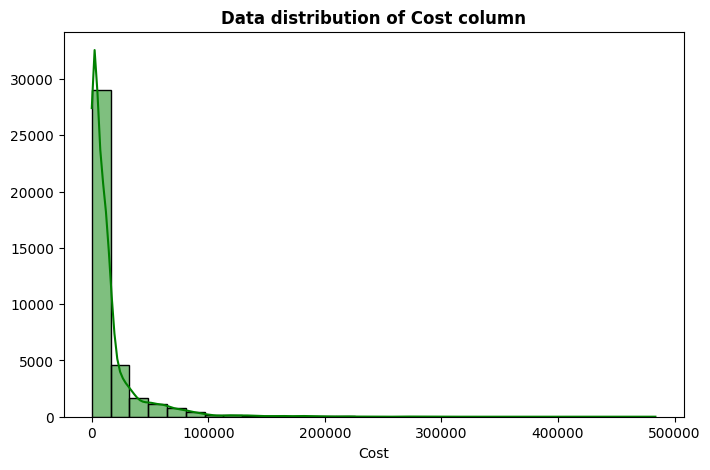

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered3, x='Cost', bins=30,
              kde=True, color='green')
plt.title('Data distribution of Cost column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

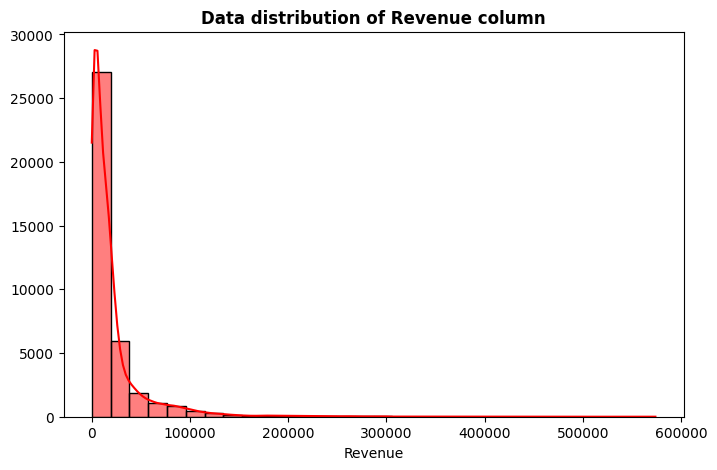

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered3, x='Revenue', bins=30,
              kde=True, color='red')
plt.title('Data distribution of Revenue column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

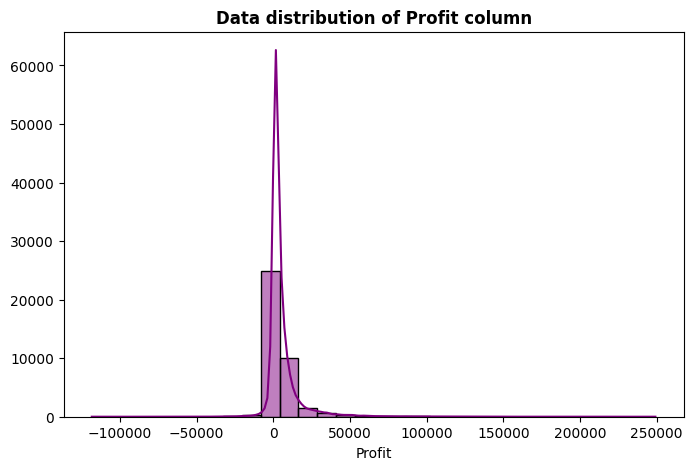

In [84]:
plt.figure(figsize=(8, 5))
sns.histplot(data=filtered3, x='Profit', bins=30,
              kde=True, color='purple')
plt.title('Data distribution of Profit column', fontweight='bold')
plt.ylabel("")
plt.show()

Skewed Data Distribution.

Inferential Time Series Analysis.<br>
Do profit, revenue, and sales change significantly across different months or specific seasons of the year, and is <br>
there any observable trend over the six-year period ?

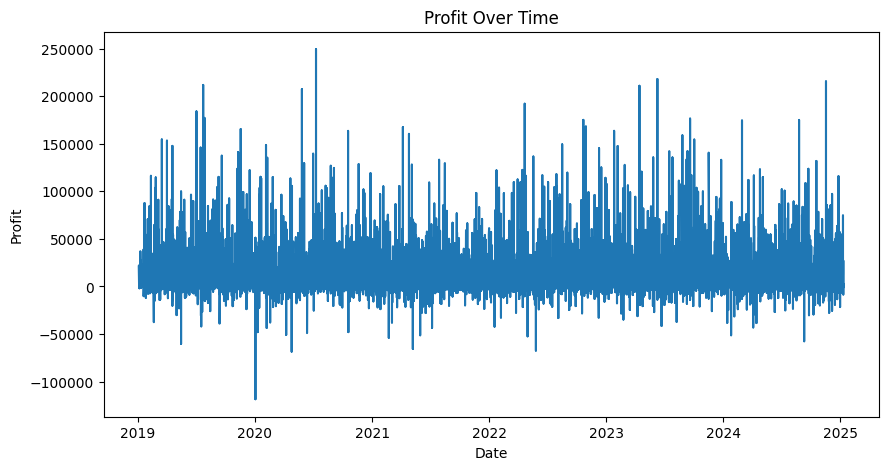

ADF Statistic: -194.6980377657286
ADF p-value: 0.0


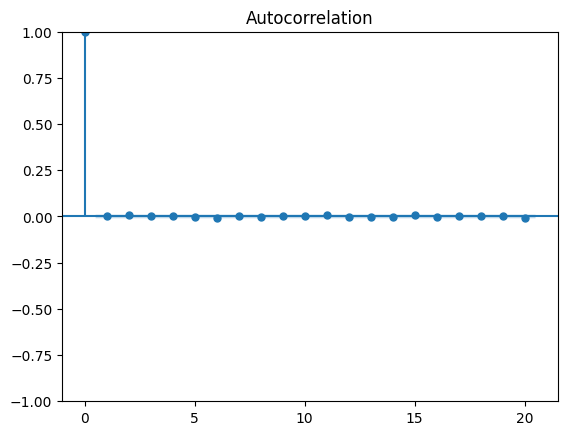

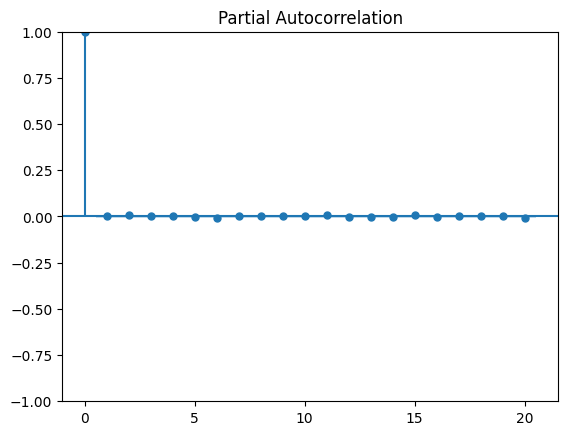

     lb_stat  lb_pvalue
10  7.691466   0.658945

Time-Profit Correlation: -0.0009460193334890168
Correlation p-value: 0.8533594937346847

ANOVA F-statistic: 1.0276643467558004
ANOVA p-value: 0.4181605294659343


In [80]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import f_oneway, pearsonr

filtered3 = filtered3.copy()
filtered3['Delivered_date'] = pd.to_datetime(filtered3['Delivered_date'])
filtered3 = filtered3.sort_values('Delivered_date')
filtered3.set_index('Delivered_date', inplace=True)

#Time series visualization
plt.figure(figsize=(10,5))
plt.plot(filtered3['Profit'])
plt.title('Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

# ADF test
adf_stat, p_value, _, _, _, _ = adfuller(filtered3['Profit'].dropna())
print("ADF Statistic:", adf_stat)
print("ADF p-value:", p_value)

# ACF and PACF
plot_acf(filtered3['Profit'].dropna(), lags=20)
plt.show()
plot_pacf(filtered3['Profit'].dropna(), lags=20)
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(filtered3['Profit'].dropna(), lags=[10], return_df=True)
print(lb_test)
print("")

# Time vs Profit correlation
time_index = np.arange(len(filtered3))
corr, p_corr = pearsonr(time_index, filtered3['Profit'].dropna())
print("Time-Profit Correlation:", corr)
print("Correlation p-value:", p_corr)
print("")

# ANOVA by Month
filtered3['Month'] = filtered3.index.month
groups = [group['Profit'].dropna() for _, group in filtered3.groupby('Month')]
f_stat, p_val = f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)


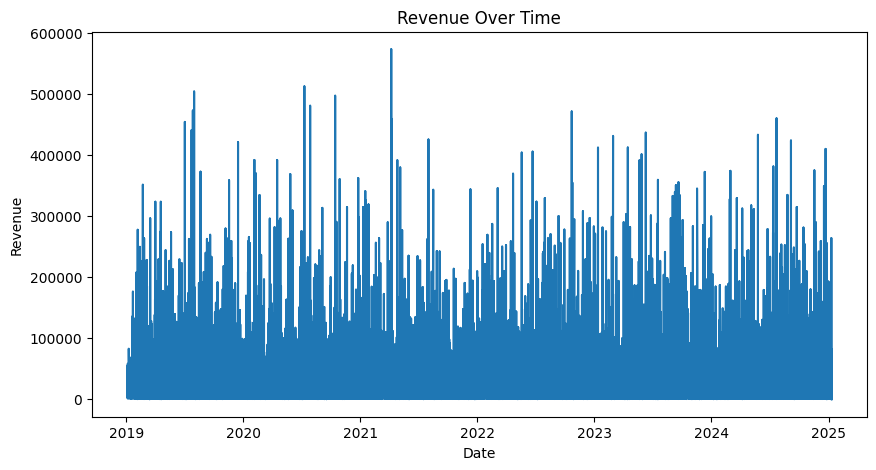

ADF Statistic: -195.47859133770365
ADF p-value: 0.0


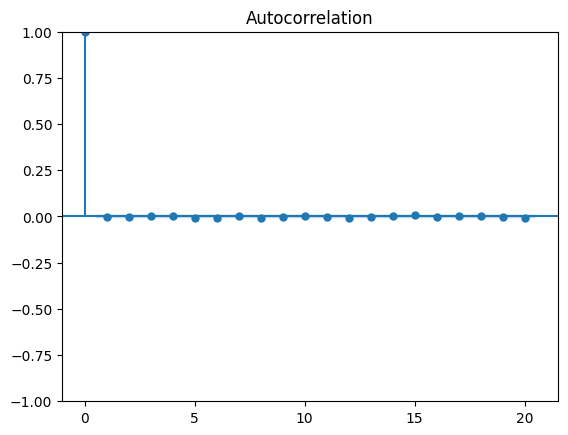

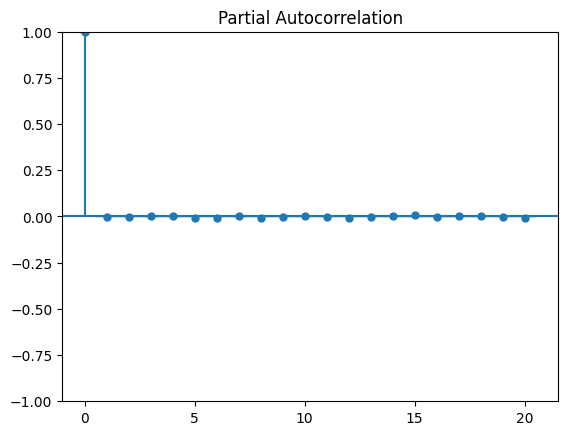

      lb_stat  lb_pvalue
10  11.344334   0.331328

Time-Revenue Correlation: 0.003908646732584528
Correlation p-value: 0.44506042279618274

ANOVA F-statistic: 1.5970348238465126
ANOVA p-value: 0.09222794208088289


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import f_oneway, pearsonr

filtered3 = filtered3.copy()
filtered3['Delivered_date'] = pd.to_datetime(filtered3['Delivered_date'])
filtered3 = filtered3.sort_values('Delivered_date')
filtered3.set_index('Delivered_date', inplace=True)

# Time series visualization
plt.figure(figsize=(10,5))
plt.plot(filtered3['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

# ADF test
adf_stat, p_value, _, _, _, _ = adfuller(filtered3['Revenue'].dropna())
print("ADF Statistic:", adf_stat)
print("ADF p-value:", p_value)

# ACF and PACF
plot_acf(filtered3['Revenue'].dropna(), lags=20)
plt.show()
plot_pacf(filtered3['Revenue'].dropna(), lags=20)
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(filtered3['Revenue'].dropna(), lags=[10], return_df=True)
print(lb_test)
print("")

# Time vs Revenue correlation
time_index = np.arange(len(filtered3))
corr, p_corr = pearsonr(time_index, filtered3['Revenue'].dropna())
print("Time-Revenue Correlation:", corr)
print("Correlation p-value:", p_corr)
print("")

# ANOVA by Month
filtered3['Month'] = filtered3.index.month
groups = [group['Revenue'].dropna() for _, group in filtered3.groupby('Month')]
f_stat, p_val = f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)


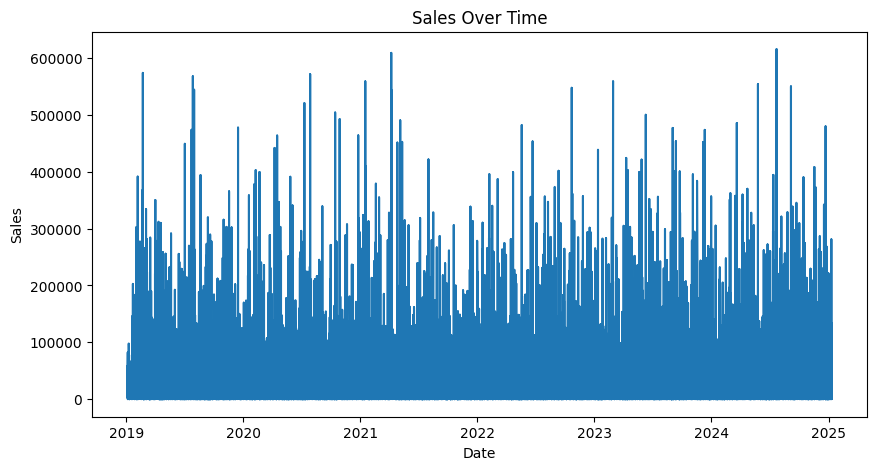

ADF Statistic: -195.5868429572899
ADF p-value: 0.0


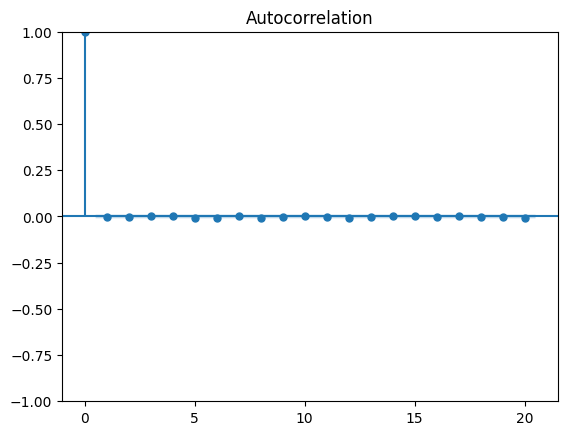

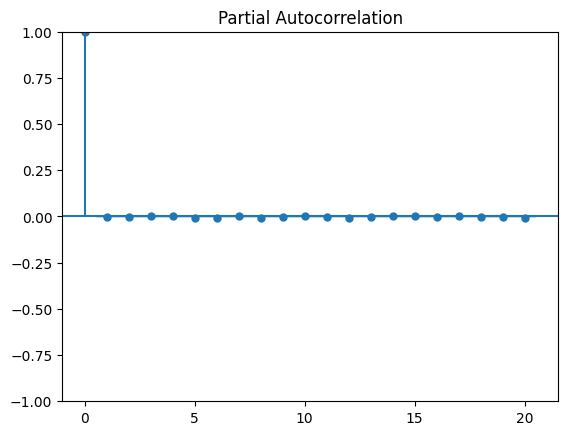

     lb_stat  lb_pvalue
10  12.34872   0.262396

Time-Sales Correlation: 0.004075947853501906
Correlation p-value: 0.42582071583533265

ANOVA F-statistic: 1.5309112440639152
ANOVA p-value: 0.11275063010760704


In [87]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import f_oneway, pearsonr

filtered3 = filtered3.copy()
filtered3['Delivered_date'] = pd.to_datetime(filtered3['Delivered_date'])
filtered3 = filtered3.sort_values('Delivered_date')
filtered3.set_index('Delivered_date', inplace=True)

# Time series visualization
plt.figure(figsize=(10,5))
plt.plot(filtered3['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# ADF test
adf_stat, p_value, _, _, _, _ = adfuller(filtered3['Sales'].dropna())
print("ADF Statistic:", adf_stat)
print("ADF p-value:", p_value)

# ACF and PACF
plot_acf(filtered3['Sales'].dropna(), lags=20)
plt.show()
plot_pacf(filtered3['Sales'].dropna(), lags=20)
plt.show()

# Ljung-Box test
lb_test = acorr_ljungbox(filtered3['Sales'].dropna(), lags=[10], return_df=True)
print(lb_test)
print("")

# Time vs Sales correlation
time_index = np.arange(len(filtered3))
corr, p_corr = pearsonr(time_index, filtered3['Sales'].dropna())
print("Time-Sales Correlation:", corr)
print("Correlation p-value:", p_corr)
print("")

# ANOVA by Month
filtered3['Month'] = filtered3.index.month
groups = [group['Sales'].dropna() for _, group in filtered3.groupby('Month')]
f_stat, p_val = f_oneway(*groups)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_val)


The analysis shows that profit, revenue, and sales are stationary (ADF p-value), which is highly significant, indicating that<br>
there is no long-term trend. The autocorrelation tests (ACF/PACF and Ljung-Box p-value) indicate no significant lagged dependence <br>
meaning the series behaves like white noise. The time–profit, revenue, and sales correlation (p-value) confirms that there <br>
is no systematic increase or decrease over time. Finally, the ANOVA test (p-value) shows no significant differences in profit,<br> 
revenue, and sales across months, indicating that there is no seasonal effect.


Hypothesis Testing (Anova).<br>
Are there meaningful differences in sales, revenue, and profit between regions and states ?

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("Profit by Region:")
model = ols('Profit ~ C(Region)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Profit by State:")
model = ols('Profit ~ C(State)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Sales by Region:")
model = ols('Sales ~ C(Region)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Sales by State:")
model = ols('Sales ~ C(State)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Revenue by Region:")
model = ols('Revenue ~ C(Region)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Revenue by State:")
model = ols('Revenue ~ C(State)', data=filtered3).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Profit by Region:
                 sum_sq       df         F    PR(>F)
C(Region)  7.610626e+08      4.0  1.271079  0.278775
Residual   5.713750e+12  38171.0       NaN       NaN

Profit by State:
                sum_sq       df         F    PR(>F)
C(State)  4.654333e+09     24.0  1.295767  0.151071
Residual  5.709857e+12  38151.0       NaN       NaN

Sales by Region:
                 sum_sq       df         F    PR(>F)
C(Region)  7.736763e+09      4.0  1.146529  0.332476
Residual   6.439437e+13  38171.0       NaN       NaN

Sales by State:
                sum_sq       df         F    PR(>F)
C(State)  5.210839e+10     24.0  1.287223  0.156987
Residual  6.435000e+13  38151.0       NaN       NaN

Revenue by Region:
                 sum_sq       df         F    PR(>F)
C(Region)  5.919345e+09      4.0  1.229022  0.296036
Residual   4.596081e+13  38171.0       NaN       NaN

Revenue by State:
                sum_sq       df         F    PR(>F)
C(State)  4.098103e+10     24.0  1.418474  0.0839

None of the p-values fall below the conventional threshold of 0.05, indicating that region and state do not have a significant<br>
impact on profit, sales, or revenue in this analysis. The closest to significance is revenue by state (p ≈ 0.084), which may<br>
warrant further investigation using more granular data or alternative modeling approaches.

Hypothesis Testing (Anova).<br>
Does product category or subcategory have a significant impact on profit, revenue, and sales?

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("Profit by Category:")
model = ols('Profit ~ C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Profit by Sub_category:")
model = ols('Profit ~ C(Sub_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Sales by Category:")
model = ols('Sales ~ C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Sales by Sub_category:")
model = ols('Sales ~ C(Sub_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Revenue by Category:")
model = ols('Revenue ~ C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("")

print("Revenue by Sub_category:")
model = ols('Revenue ~ C(Sub_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Profit by Category:
                   sum_sq       df         F    PR(>F)
C(Category)  9.400641e+08      7.0  0.897121  0.507491
Residual     5.713571e+12  38168.0       NaN       NaN

Profit by Sub_category:
                       sum_sq       df         F   PR(>F)
C(Sub_category)  8.320082e+09     42.0  1.323832  0.07801
Residual         5.706191e+12  38133.0       NaN      NaN

Sales by Category:
                   sum_sq       df         F   PR(>F)
C(Category)  3.635450e+09      7.0  0.307811  0.95078
Residual     6.439847e+13  38168.0       NaN      NaN

Sales by Sub_category:
                       sum_sq       df         F    PR(>F)
C(Sub_category)  9.647726e+10     42.0  1.362159  0.059036
Residual         6.430563e+13  38133.0       NaN       NaN

Revenue by Category:
                   sum_sq       df         F    PR(>F)
C(Category)  2.661177e+09      7.0  0.315687  0.947316
Residual     4.596407e+13  38168.0       NaN       NaN

Revenue by Sub_category:
                    

Profit, Sales, and Revenue by Category.<br>
Profit, sales, and revenue do not significantly differ across categories. These results show no meaningful differences and indicate<br>
that category-level segmentation does not have a significant impact on profit, revenue, or sales.<br>

Profit and Sales by Sub-Category.<br>
The results are near the significance level and may indicate weak effects. In particular, the impact of sales by sub-category <br>
(p = 0.059) is very close to the threshold value.<br>

Revenue by Sub-Category.<br>
These results are statistically significant, showing clear differences across groups. Revenue by sub-category (p = 0.047) indicates <br>
that sub-category significantly influences revenue, and the product sub-category has a measurable impact on it.<br>

Key Insights<br>
- Category-level analysis is too broad and does not explain variation in profit, sales, or revenue.
- Sub-category-level analysis is more informative, showing borderline effects on profit and sales. Revenue shows a clear and <br> statistically significant effect.


Normal Probability Distribution.<br>
What is the probability that the delivery charge will fall between 1 and 199, and between 200 and 500, in the future ?<br>
The upper limit of 500 was selected because it is the maximum delivery charge observed in the dataset.

In [21]:
from scipy.stats import norm 
delivery_charge = filtered3['Delivery_charge'].to_numpy()
mean = np.mean(delivery_charge)
std = np.std(delivery_charge)

lower = 1
middle_1 = 199

middle_2 = 200
upper = 500

print("Probability and Percentage of Delivery_charge between", lower, "and", middle_1)
delivery_charge_prob = norm.cdf(middle_1, mean, std) - norm.cdf(lower, mean, std)
rounded_delivery_charge_prob = np.round(delivery_charge_prob, 4)
print("Probability:", rounded_delivery_charge_prob)
percentage = np.round(rounded_delivery_charge_prob * 100, 2)
print("Percentage:", percentage)
print("")

print("Probability and Percentage of Delivery_charge between", middle_2, "and", upper)
delivery_charge_prob = norm.cdf(upper, mean, std) - norm.cdf(middle_2, mean, std)
rounded_delivery_charge_prob = np.round(delivery_charge_prob, 4)
print("Probability:", rounded_delivery_charge_prob)
percentage = np.round(rounded_delivery_charge_prob * 100, 2)
print("Percentage:", percentage)

Probability and Percentage of Delivery_charge between 1 and 199
Probability: 0.6035
Percentage: 60.35

Probability and Percentage of Delivery_charge between 200 and 500
Probability: 0.3015
Percentage: 30.15


Categorical Probability Distribution.<br>
In which state has the product been sold the most?

In [32]:
state_prob = filtered3['State'].value_counts(normalize=True)
rounded_state_prob = state_prob.round(4)
print("\nCategorical Probability Distribution of", rounded_state_prob)
perce = np.round(rounded_state_prob * 100, 2)
print("\nPercentage of",perce)

state = filtered3['State'].value_counts()
print("\nCount of", state)


Categorical Probability Distribution of State
Kerala              0.1009
Bihar               0.0775
Maharashtra         0.0691
West Bengal         0.0691
Tamil Nadu          0.0659
Uttar Pradesh       0.0651
Nagaland            0.0588
Andhra Pradesh      0.0554
Telangana           0.0531
Karnataka           0.0469
Himachal Pradesh    0.0435
Rajasthan           0.0338
Odisha              0.0332
Mizoram             0.0332
Gujarat             0.0330
Manipur             0.0325
Goa                 0.0230
Tripura             0.0227
Chandigarh          0.0128
Jharkhand           0.0127
Haryana             0.0123
Punjab              0.0116
Kashmir             0.0114
Assam               0.0114
Delhi               0.0112
Name: proportion, dtype: float64

Percentage of State
Kerala              10.09
Bihar                7.75
Maharashtra          6.91
West Bengal          6.91
Tamil Nadu           6.59
Uttar Pradesh        6.51
Nagaland             5.88
Andhra Pradesh       5.54
Telangana       

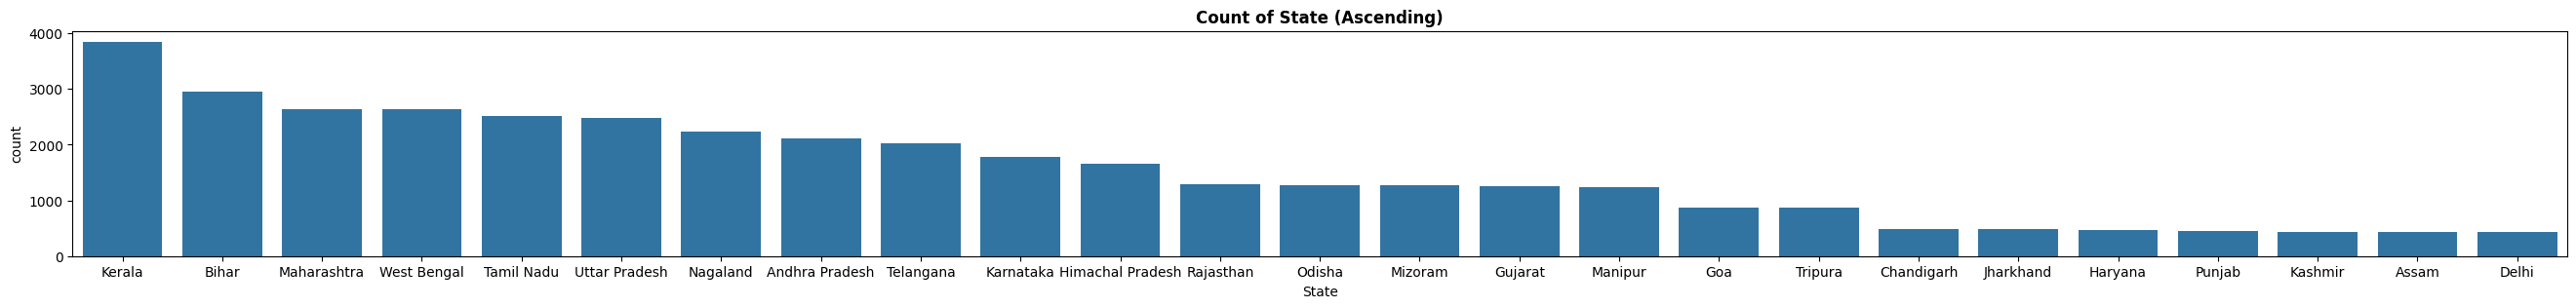

In [35]:
state = filtered3['State'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(33,3))
sns.countplot(data=filtered3, x='State', order=state)
plt.title('Count of State (Ascending)', fontweight='bold')
plt.show()

Which payment method is preferred by most customers ?

In [34]:
payment_prob = filtered3['Payment_method'].value_counts(normalize=True)
rounded_payment_prob = payment_prob.round(4)
print("\nCategorical Probability Distribution of", rounded_payment_prob)
perce = np.round(rounded_payment_prob * 100, 2)
print("\nPercentage of",perce)

payment = filtered3['Payment_method'].value_counts()
print("\nCount of", payment)


Categorical Probability Distribution of Payment_method
UPI Methods         0.2436
Cash on Delivery    0.1672
Credit Card         0.1652
Wallet Payment      0.1507
Debit Card          0.1089
Net Banking         0.1084
EMI                 0.0561
Name: proportion, dtype: float64

Percentage of Payment_method
UPI Methods         24.36
Cash on Delivery    16.72
Credit Card         16.52
Wallet Payment      15.07
Debit Card          10.89
Net Banking         10.84
EMI                  5.61
Name: proportion, dtype: float64

Count of Payment_method
UPI Methods         9298
Cash on Delivery    6383
Credit Card         6307
Wallet Payment      5752
Debit Card          4157
Net Banking         4137
EMI                 2142
Name: count, dtype: int64


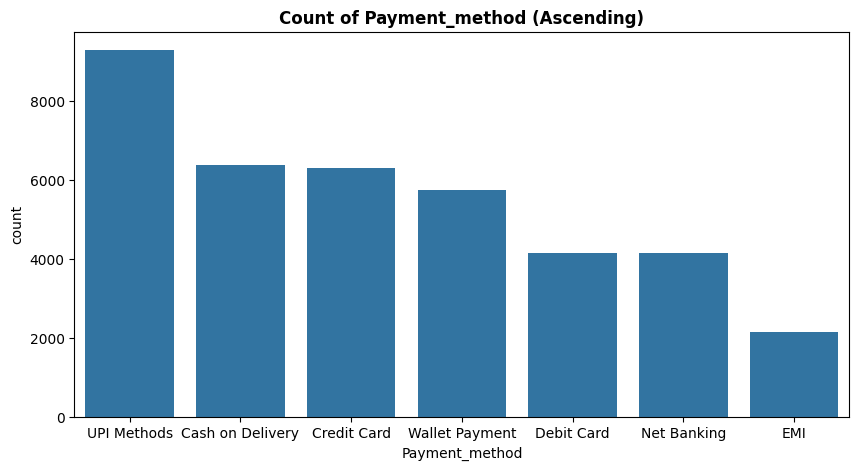

In [37]:
payment = filtered3['Payment_method'].value_counts().sort_values(ascending=False).index

plt.figure(figsize=(10,5))
sns.countplot(data=filtered3, x='Payment_method', order=payment)
plt.title('Count of Payment_method (Ascending)', fontweight='bold')
plt.show()

Regression Analysis.<br>
Does higher business cost lead to increased profit ?

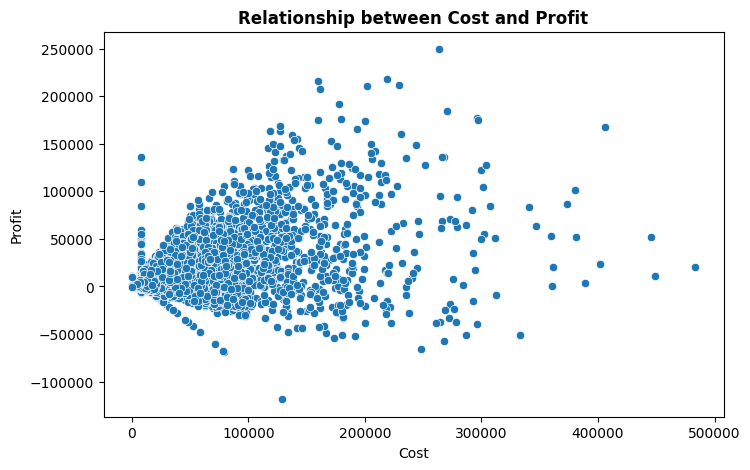

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered3, x='Cost', y='Profit')
plt.title('Relationship between Cost and Profit', fontweight='bold')
plt.show()

In [41]:
import statsmodels.api as sm

# Independent variables
X = filtered3["Cost"]
# Dependent variable
Y = filtered3['Profit']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:28:11   Log-Likelihood:            -4.0633e+05
No. Observations:               38176   AIC:                         8.127e+05
Df Residuals:                   38174   BIC:                         8.127e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1695.4755     60.012     28.252      0.0

The regression shows a positive and significant relationship between cost and profit. The model explains a moderate share<br>
of variation with an R² of 0.313. The effect of cost on profit is highly significant, with p < 0.001. Residual checks <br>
suggest distribution issues, indicating other factors may also influence profit. Overall, higher costs are linked with higher<br>
profits, though additional variables should be considered for deeper insight.


Does increasing business costs help increase sales ?

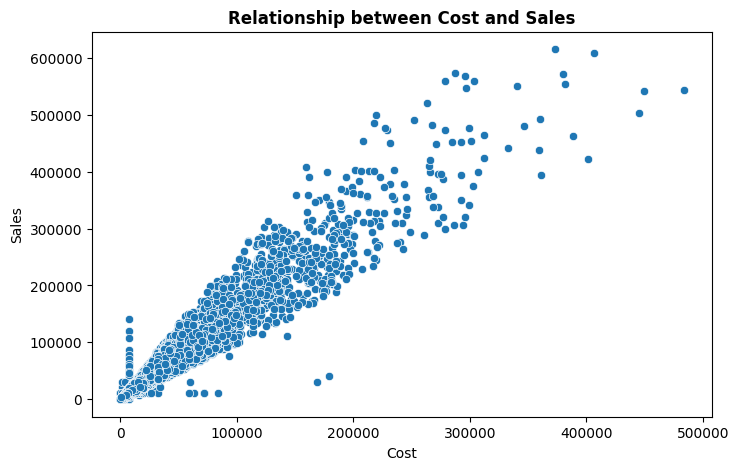

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered3, x='Cost', y='Sales')
plt.title('Relationship between Cost and Sales', fontweight='bold')
plt.show()

In [43]:
import statsmodels.api as sm

# Independent variables
X = filtered3["Cost"]
# Dependent variable
Y = filtered3['Sales']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 5.918e+05
Date:                Tue, 16 Dec 2025   Prob (F-statistic):               0.00
Time:                        13:38:31   Log-Likelihood:            -4.0620e+05
No. Observations:               38176   AIC:                         8.124e+05
Df Residuals:                   38174   BIC:                         8.124e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1045.8351     59.817     17.484      0.0

The regression shows a positive and significant relationship between cost and sales. The model explains a very large share<br>
of variation with an R² of 0.939, and the effect of cost on sales is highly significant with p < 0.001. Residual checks suggest <br>
distribution issues, indicating other influences may exist. Overall, higher costs are strongly linked with higher sales,<br>
though adding more variables could provide deeper understanding.


The Cost vs. Profit model shows a low R² value of 0.31, indicating a weak relationship. In contrast, the Cost vs. Sales model <br>
has a high R² value of 0.93, indicating a strong positive relationship, which is also evident from the scatter plot visualization.<br> However, in both cases, the p-values are below the 0.05 threshold, indicating that the relationships are statistically significant.

Correlation & Covariance Analysis.<br>
Does increasing business costs help generate more revenue ?

In [45]:
correlation = filtered3[['Cost', 'Revenue']].corr()
print("\nCorrelation value:\n", correlation)

covariance = filtered3[['Cost', 'Revenue']].cov()
print("\nCovariance value:\n", covariance)


Correlation value:
              Cost   Revenue
Cost     1.000000  0.956318
Revenue  0.956318  1.000000

Covariance value:
                  Cost       Revenue
Cost     6.939956e+08  8.742044e+08
Revenue  8.742044e+08  1.204106e+09


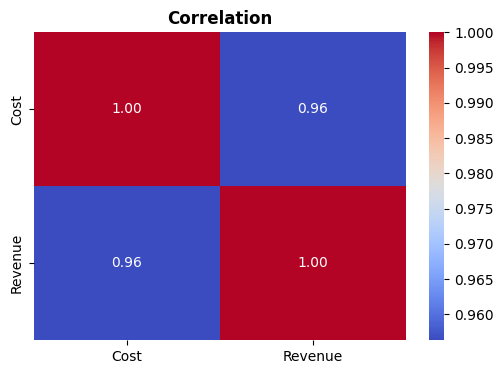

In [46]:
corr = filtered3[['Cost', 'Revenue']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation', fontweight='bold')
plt.show()

Cost and revenue are highly correlated, with a correlation coefficient of 0.96, which is very close to 1, indicating <br>
a strong positive relationship. Therefore, as expenditure increases, the business also generates higher revenue.

Outliers Detection.<br>
Are there outliers in the given columns ?

Q1: 50.0
Q3: 249.0
IQR: 199.0
Lower Bound: -248.5
Upper Bound: 547.5
Outliers in Delivery_charge: []


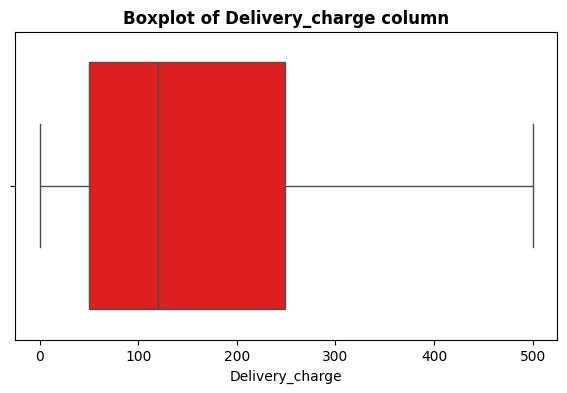

In [47]:
delivery_charge = filtered3['Delivery_charge'].to_numpy()
q1 = np.percentile(delivery_charge, 25)
q3 = np.percentile(delivery_charge, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = delivery_charge[(delivery_charge < lower_bound) | (delivery_charge > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Delivery_charge:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered3['Delivery_charge'],color='red')
plt.title('Boxplot of Delivery_charge column', fontweight='bold')
plt.show()

Q1: 2584.7650000000003
Q3: 24585.46
IQR: 22000.695
Lower Bound: -30416.277499999997
Upper Bound: 57586.502499999995
Outliers in Sales: [ 58717.75  82617.24  97967.88 ...  86869.32 281017.89 133709.92]


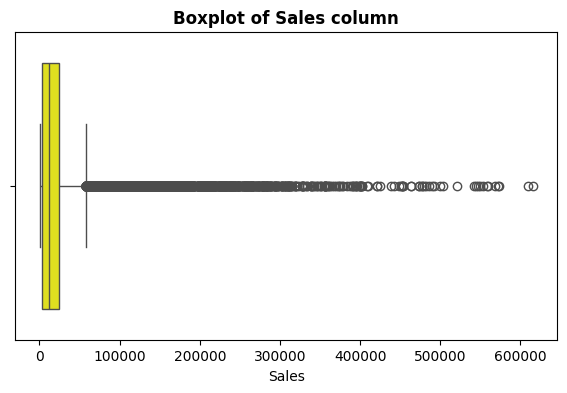

In [48]:
sales = filtered3['Sales'].to_numpy()
q1 = np.percentile(sales, 25)
q3 = np.percentile(sales, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = sales[(sales < lower_bound) | (sales > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Sales:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered3['Sales'],color='yellow')
plt.title('Boxplot of Sales column', fontweight='bold')
plt.show()

Q1: 1634.5249999999999
Q3: 15674.2075
IQR: 14039.6825
Lower Bound: -19424.99875
Upper Bound: 36733.73125
Outliers in Cost: [ 56215.77  45753.21  39167.45 ...  42245.1  189451.08  84788.15]


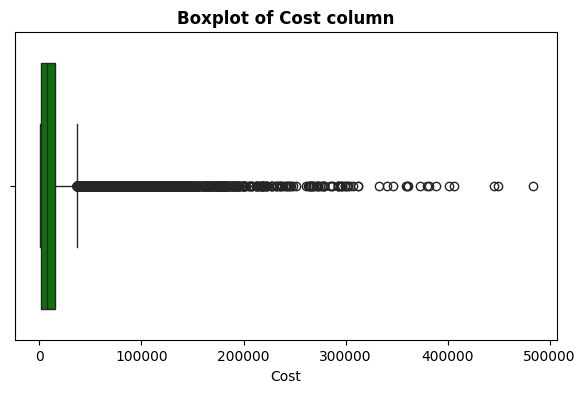

In [49]:
cost = filtered3['Cost'].to_numpy()
q1 = np.percentile(cost, 25)
q3 = np.percentile(cost, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = cost[(cost < lower_bound) | (cost > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Cost:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered3['Cost'],color='green')
plt.title('Boxplot of Cost column', fontweight='bold')
plt.show()

Q1: 3280.6800000000003
Q3: 21507.3125
IQR: 18226.6325
Lower Bound: -24059.26875
Upper Bound: 48847.261249999996
Outliers in Revenue: [ 54064.58  58256.68  82834.53 ...  49782.11 264027.34  81960.72]


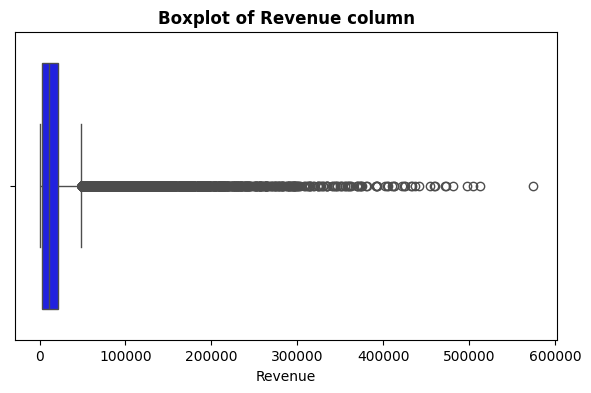

In [50]:
revenue = filtered3['Revenue'].to_numpy()
q1 = np.percentile(revenue, 25)
q3 = np.percentile(revenue, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = revenue[(revenue < lower_bound) | (revenue > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Revenue:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered3['Revenue'],color='blue')
plt.title('Boxplot of Revenue column', fontweight='bold')
plt.show()

Q1: 1060.89
Q3: 6025.8075
IQR: 4964.9175
Lower Bound: -6386.486249999999
Upper Bound: 13473.18375
Outliers in Profit: [21061.15 21984.76 18457.08 ... 74576.26 -8385.73 27052.56]


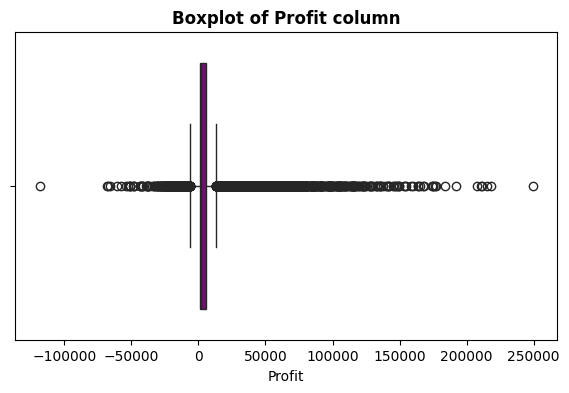

In [51]:
profit = filtered3['Profit'].to_numpy()
q1 = np.percentile(profit, 25)
q3 = np.percentile(profit, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = profit[(profit < lower_bound) | (profit > upper_bound)]
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outliers in Profit:", outliers)
plt.figure(figsize=(7, 4))
sns.boxplot(x=filtered3['Profit'],color='purple')
plt.title('Boxplot of Profit column', fontweight='bold')
plt.show()

## Conclusion
The statistical analysis report has now been completed. This analysis helped in understanding the individual variables and<br>
the relationships between columns in the dataset. Key insights were derived from six years of e-commerce business data, <br>
providing a statistical understanding of business performance and trends. The findings from this report will support better<br> decision-making and serve as a strong foundation for future machine learning models to predict and forecast e-commerce and<br>
sales performance over the next six to seven years. Finally, the dataset will be stored in a database to enable efficient<br>
data storage, retrieval, and reuse for future analysis and modeling.